In [1]:
# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Syneromics plots

In [169]:
synergies = pd.read_csv("syn_results/final_results.tsv", sep='\t')

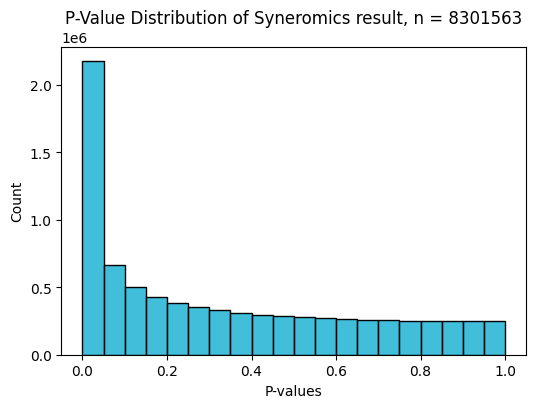

In [173]:
plt.rcParams['figure.figsize']=(6,4)
hist = sns.histplot(synergies, x='P>|z|', bins=20, color='#00A9CE')
hist.set(xlabel="P-values", title=f"P-Value Distribution of Syneromics Result, n = {len(synergies.coef_id)}")
plt.show()

### Explainability plots

In [2]:
models = pd.read_csv("exp_results/combined_models.tsv", sep='\t')

C:\Users\wen068\AppData\Local\Temp\ipykernel_11432\1150118816.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  models = pd.read_csv("exp_results/combined_models.tsv", sep='\t')


In [3]:
syn_mask = models.coef_id.str.contains(':')

In [4]:
synergies = models[syn_mask]
synergies = synergies[synergies.order == 4]
synergies.config.value_counts()

config
a: 0.05 f: 0      1092431
a: 0.01 f: 0       583749
a: 0.05 f: 0.5      44464
a: 0.01 f: 0.5      29470
Name: count, dtype: int64

In [5]:
n = synergies.config.value_counts()

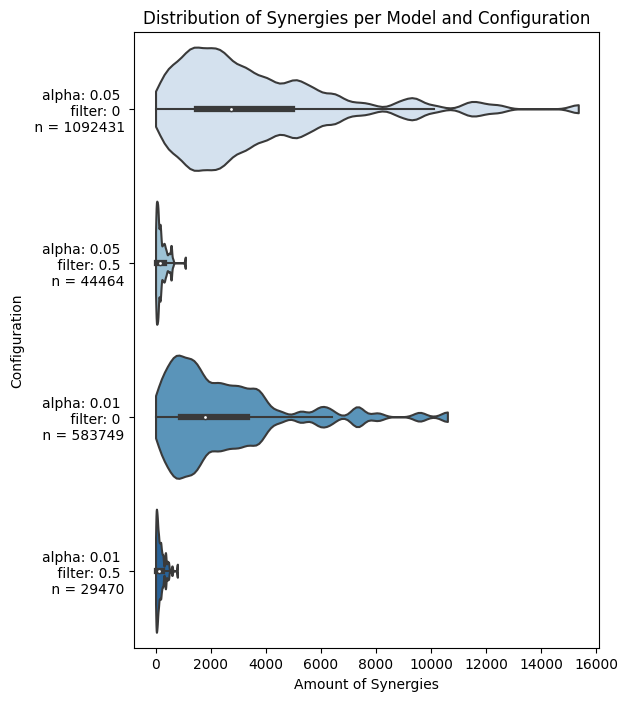

In [6]:
plt.rcParams['figure.figsize']=(6,8)

plot = sns.violinplot(models[models.order ==4], x="n_syn", y="config",orient="h", cut=0, scale="width", palette="Blues", bw=0.1)
plot.set_title("Distribution of Synergies per Model and Configuration")
plot.set(xlabel="Amount of Synergies", ylabel="Configuration")
plot.set_yticks(range(len(n)))
plot.set_yticklabels([f'alpha: 0.05 \n filter: 0 \n n = {n[0]}', f'alpha: 0.05 \n filter: 0.5 \n n = {n[2]}', f'alpha: 0.01 \n filter: 0 \n n = {n[1]}', f'alpha: 0.01 \n filter: 0.5 \n n = {n[3]}'])
plt.show()

In [7]:
len(set(models.drug))

732

In [7]:
models.drug.value_counts()

drug
1012    75755
1011    72663
1008    63651
1017    62284
1050    60638
        ...  
1150       22
53         14
87         14
1631       14
1853       14
Name: count, Length: 732, dtype: int64

In [8]:
del models

In [2]:
performance = pd.read_csv("exp_results/combined_performances.tsv", sep='\t')

In [136]:
performance[["config", "order"]].value_counts()

config          order
a: 0.05 f: 0    1        732
                2        732
                4        732
a: 0.01 f: 0    1        701
                2        701
                4        701
a: 0.05 f: 0.5  1        694
                2        694
                4        694
a: 0.01 f: 0.5  1        621
                2        621
                4        621
Name: count, dtype: int64

In [133]:
n = performance.config.value_counts()

In [6]:
no_nan = performance.dropna()

In [8]:
rf = pd.read_csv("syn_results/tree_performances.tsv", sep='\t')

In [9]:
rf["config"] = "rf"
rf["order"] = 1

In [126]:
combine = pd.concat([performance, rf], ignore_index=True)

In [161]:
n = pearsonR.count()
n

config          order
a: 0.01 f: 0    1        701
                2        701
                4        701
a: 0.01 f: 0.5  1        621
                2        621
                4        621
a: 0.05 f: 0    1        732
                2        732
                4        732
a: 0.05 f: 0.5  1        694
                2        694
                4        694
dtype: int64

In [179]:
csiro_palette = ['#00B0F0', '#00A9CE', '#007377']

sns.set_palette(palette=csiro_palette)

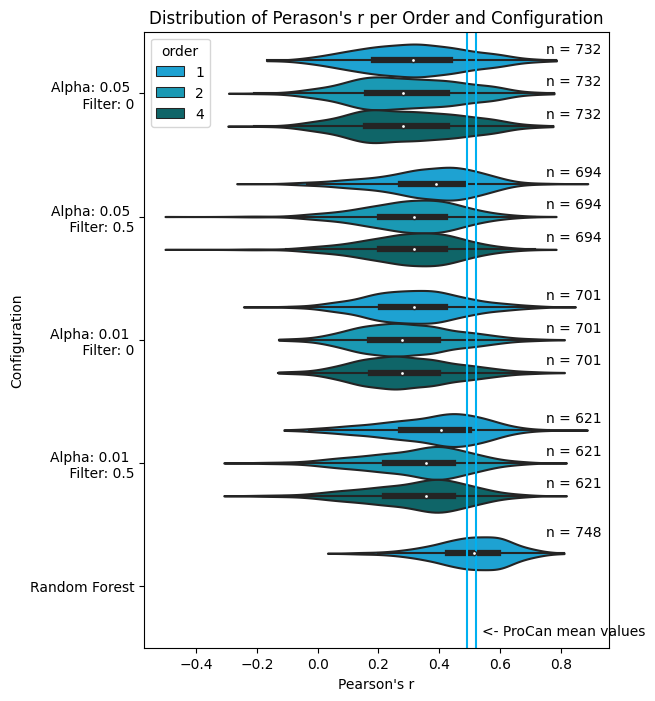

In [180]:
plt.rcParams['figure.figsize']=(6,8)
violin = sns.violinplot(combine, x="pearsonR", y="config", hue="order", orient="h", cut=0, scale="count")
plt.axvline(0.49, 0)
plt.axvline(0.52, 0)
violin.set_title("Distribution of Perason's r per Order and Configuration")
violin.set(xlabel="Pearson's r", ylabel="Configuration")
violin.set_yticks(range(5))
violin.set_yticklabels([f'Alpha: 0.05 \n Filter: 0', f'Alpha: 0.05 \n Filter: 0.5', f'Alpha: 0.01 \n Filter: 0', f'Alpha: 0.01 \n Filter: 0.5', f'Random Forest'])

y_pos = [2,3,0,1]
for i in range(4):
    violin.text(0.75, y_pos[i]+0.2, f'n = {n[3*i]} \n \nn = {n[3*i+1]} \n \nn = {n[3*i+2]}')
violin.text(0.75, 4-0.4, f'n = {len(rf.order)}')
violin.text(0.54, 4+0.4, f'<- ProCan mean values')
plt.show()

In [159]:
pearsonR = pd.pivot_table(performance, values = 'pearsonR', index=['drug'], columns=['config', "order"])

In [160]:
pearsonR

config a: 0.01 f: 0                     a: 0.01 f: 0.5                      \
order             1         2         4              1         2         4   
drug                                                                         
1          0.270397  0.475833  0.475833       0.012881  0.119891  0.119891   
3          0.094295  0.244218  0.244491       0.264860  0.380247  0.380247   
5          0.184380  0.336558  0.328539       0.176038  0.346857  0.346857   
6          0.258966  0.113134  0.113134       0.203552  0.203552  0.203552   
9               NaN       NaN       NaN            NaN       NaN       NaN   
...             ...       ...       ...            ...       ...       ...   
2505       0.357498  0.399968  0.400476       0.183032  0.180058  0.180058   
2508       0.616915  0.617137  0.617137       0.323330  0.325333  0.325333   
2509            NaN       NaN       NaN            NaN       NaN       NaN   
2510       0.446625  0.374614  0.371653       0.535058  0.401584  0.401584   
2638       0.723492  0.774385  0.774385            NaN       NaN       NaN   

config a: 0.05 f: 0                     a: 0.05 f: 0.5                      
order             1         2         4              1         2         4  
drug                                                                        
1          0.190717 -0.081475 -0.081475       0.109163  0.088102  0.088102  
3          0.277710  0.188576  0.187872       0.299634  0.324866  0.324866  
5         -0.030199  0.304115  0.299835       0.262361  0.291873  0.291873  
6          0.337088  0.151135  0.151135       0.145925  0.013608  0.013608  
9          0.158074  0.005084  0.005084      -0.051951 -0.050480 -0.050480  
...             ...       ...       ...            ...       ...       ...  
2505       0.383024  0.409152  0.419128      -0.066107  0.299711  0.299711  
2508       0.137095  0.235608  0.240953       0.468438  0.377574  0.377574  
2509       0.242250  0.176419  0.176419       0.024330 -0.010844 -0.010844  
2510       0.408480  0.395010  0.367428       0.461390  0.207329  0.207329  
2638       0.723492  0.774385  0.774385            NaN       NaN       NaN  

[732 rows x 12 columns]